
**COLOR OPTIMIZATION MODEL (XG BOOST AND RANDOMFOREST) **
> Add blockquote



**Color and Quantity Prediction Using Machine Learning Models**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
import joblib
from xgboost import XGBRegressor

# Load dataset in Google Colab
file_path = "/content/Color-data.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Define input features and target color
features = ['BL', 'BA', 'BB', 'Angle', 'Stroke_Value', 'Factor']
color_columns = ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N', 'R15023X']

df['target_color'] = df[color_columns].idxmax(axis=1)
df['target_quantity'] = df.apply(lambda row: row[row['target_color']], axis=1)

# Split dataset
X = df[features]
y_color = df['target_color']
y_quantity = df['target_quantity']
X_train, X_test, y_train_color, y_test_color, y_train_quantity, y_test_quantity = train_test_split(
    X, y_color, y_quantity, test_size=0.2, random_state=42)

# Normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train color classification model
color_model = RandomForestClassifier(n_estimators=200, random_state=42)
color_model.fit(X_train_scaled, y_train_color)

# Train quantity regression model
quantity_models = {}
for color in color_columns:
    mask = (y_train_color == color)
    quantity_models[color] = XGBRegressor(n_estimators=200, random_state=42)
    quantity_models[color].fit(X_train_scaled[mask], y_train_quantity[mask])

# Evaluate models
y_color_pred = color_model.predict(X_test_scaled)
y_quantity_pred = [quantity_models[color].predict(X_test_scaled[i].reshape(1, -1))[0] if color in quantity_models else 0
                    for i, color in enumerate(y_color_pred)]

accuracy = accuracy_score(y_test_color, y_color_pred)
mae = mean_absolute_error(y_test_quantity, y_quantity_pred)
print(f'✅ Color Prediction Accuracy: {accuracy:.2f}')
print(f'📦 Quantity Prediction MAE: {mae:.2f}')

# Save models and scaler
joblib.dump(color_model, "color_model.pkl")
joblib.dump(quantity_models, "quantity_models.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Models saved successfully!")

# Function to predict multiple colors and quantities
def predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor):
    input_data = np.array([[BL, BA, BB, Angle, Stroke_Value, Factor]])
    input_scaled = scaler.transform(input_data)
    predicted_color = color_model.predict(input_scaled)[0]
    predicted_quantities = {}

    for color, model in quantity_models.items():
        predicted_quantities[color] = round(model.predict(input_scaled)[0], 2)

    return {"Predicted Colors and Quantities": predicted_quantities}

# Example prediction
result = predict_colors_and_quantities(BL=50.97, BA=-2.4, BB=-3.78, Angle=25, Stroke_Value=101, Factor=19.63)
print(result)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:15] WARNING: /workspace/src/common/error_msg.cc:52: Empty dataset at worker: 0
  warnings.warn(smsg, UserWarning)


✅ Color Prediction Accuracy: 0.60
📦 Quantity Prediction MAE: 15.50
✅ Models saved successfully!
{'Predicted Colors and Quantities': {'L21080T': 4.0, 'J92312Z': 117.93, 'J92818P': 1.08, 'J93956X': 6.0, 'J93932W': 1.38, 'R17439Z': 0.0, 'R15945K': 0.0, 'R11220N': 0.0, 'R15023X': 0.0}}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Color and Quantity Prediction Using Machine Learning Models using XG Booost and Random Classifier**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
import joblib
from xgboost import XGBRegressor

# Load dataset in Google Colab
file_path = "/content/Color-data.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Define input features and target color
features = ['BL', 'BA', 'BB', 'Angle', 'Stroke_Value', 'Factor']
color_columns = ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N', 'R15023X']

# Extract target color and quantity
df['target_color'] = df[color_columns].idxmax(axis=1)
df['target_quantity'] = df.apply(lambda row: row[row['target_color']], axis=1)

# Split dataset
X = df[features]
y_color = df['target_color']
y_quantity = df['target_quantity']
X_train, X_test, y_train_color, y_test_color, y_train_quantity, y_test_quantity = train_test_split(
    X, y_color, y_quantity, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train color classification model
color_model = RandomForestClassifier(n_estimators=200, random_state=42)
color_model.fit(X_train_scaled, y_train_color)

# Train quantity regression models for each color
quantity_models = {}
for color in color_columns:
    y_train_color_specific = df.loc[X_train.index, color]
    model = XGBRegressor(n_estimators=200, random_state=42)
    model.fit(X_train_scaled, y_train_color_specific)
    quantity_models[color] = model

# Evaluate models
y_color_pred = color_model.predict(X_test_scaled)
y_quantity_pred = [quantity_models[color].predict(X_test_scaled) for color in y_color_pred]

accuracy = accuracy_score(y_test_color, y_color_pred)
mae = mean_absolute_error(y_test_quantity, np.mean(y_quantity_pred, axis=0))
print(f'✅ Color Prediction Accuracy: {accuracy:.2f}')
print(f'📦 Quantity Prediction MAE: {mae:.2f}')

# Save models and scaler
joblib.dump(color_model, "color_model.pkl")
joblib.dump(quantity_models, "quantity_models.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Models saved successfully!")

# Function to predict colors and quantities
def predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor):
    input_data = np.array([[BL, BA, BB, Angle, Stroke_Value, Factor]])
    input_scaled = scaler.transform(input_data)
    predicted_color = color_model.predict(input_scaled)[0]
    predicted_quantities = {color: model.predict(input_scaled)[0] for color, model in quantity_models.items()}
    predicted_quantities = {color: round(qty, 2) for color, qty in predicted_quantities.items() if qty > 0}
    return {'Predicted Colors': list(predicted_quantities.keys()), 'Predicted Quantities': predicted_quantities}

# Example prediction
result = predict_colors_and_quantities(BL=51.23, BA=-2.42, BB=-4.78, Angle=25, Stroke_Value=101, Factor=19.63)
print(result)


✅ Color Prediction Accuracy: 0.60
📦 Quantity Prediction MAE: 18.63
✅ Models saved successfully!
{'Predicted Colors': ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R15945K', 'R11220N'], 'Predicted Quantities': {'L21080T': 0.0, 'J92312Z': 0.0, 'J92818P': 0.6, 'J93956X': 0.0, 'J93932W': 0.0, 'R15945K': 0.0, 'R11220N': 0.0}}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Color Prediction based on weights for Current Stroke with table and Graphs for represting the color dependency on other variables**

✅ Color Prediction Accuracy: 0.60
📦 Quantity Prediction MAE: 18.63
✅ Models saved successfully!
{'Predicted Colors': ['J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N'], 'Predicted Quantities': {'J92312Z': 0.0, 'J92818P': 6.0, 'J93956X': 12.0, 'J93932W': 5.0, 'R17439Z': 0.0, 'R15945K': 0.0, 'R11220N': 0.0}}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


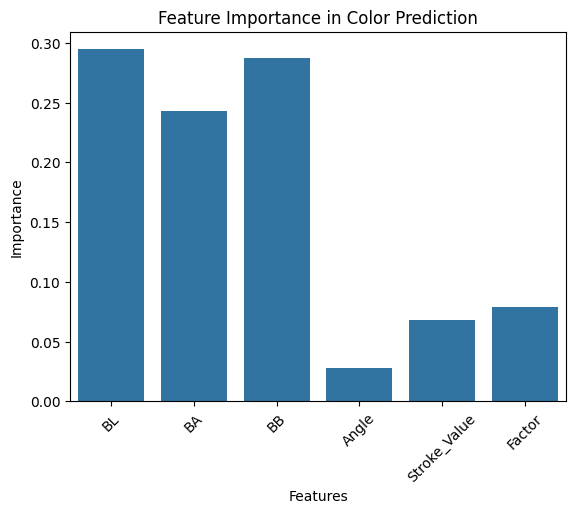

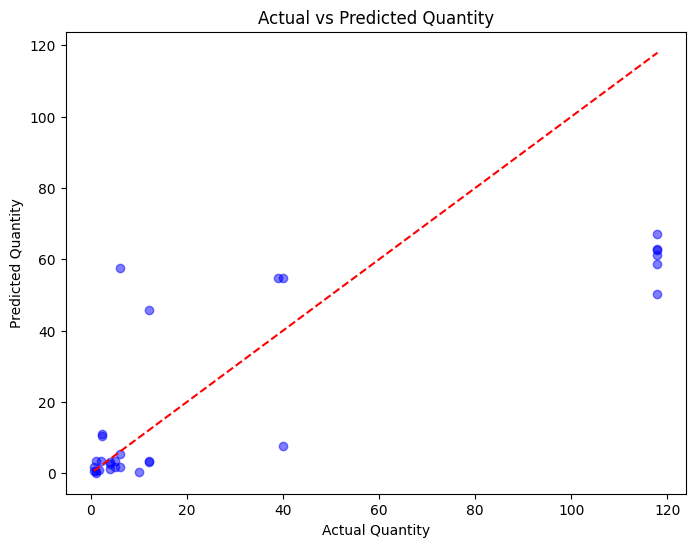

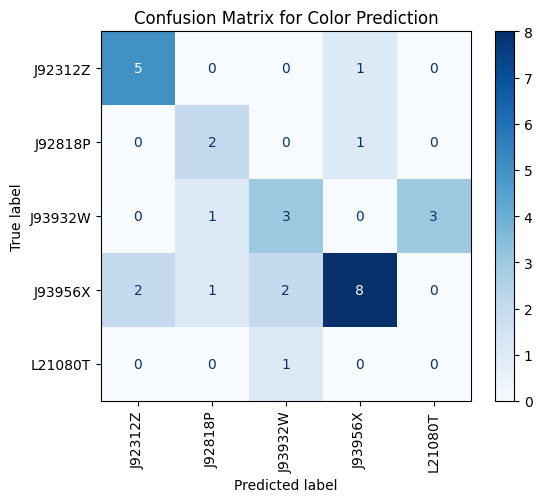

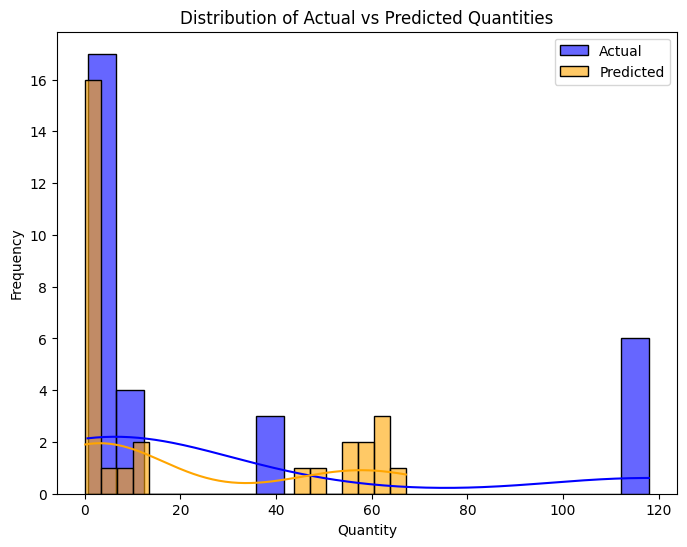

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
import joblib
from xgboost import XGBRegressor

# Load dataset in Google Colab
file_path = "/content/Color-data.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Define input features and target color
features = ['BL', 'BA', 'BB', 'Angle', 'Stroke_Value', 'Factor']
color_columns = ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N', 'R15023X']

# Extract target color and quantity
df['target_color'] = df[color_columns].idxmax(axis=1)
df['target_quantity'] = df.apply(lambda row: row[row['target_color']], axis=1)

# Split dataset
X = df[features]
y_color = df['target_color']
y_quantity = df['target_quantity']
X_train, X_test, y_train_color, y_test_color, y_train_quantity, y_test_quantity = train_test_split(
    X, y_color, y_quantity, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train color classification model
color_model = RandomForestClassifier(n_estimators=200, random_state=42)
color_model.fit(X_train_scaled, y_train_color)

# Train quantity regression models for each color
quantity_models = {}
for color in color_columns:
    y_train_color_specific = df.loc[X_train.index, color]
    model = XGBRegressor(n_estimators=200, random_state=42)
    model.fit(X_train_scaled, y_train_color_specific)
    quantity_models[color] = model

# Evaluate models
y_color_pred = color_model.predict(X_test_scaled)
y_quantity_pred = [quantity_models[color].predict(X_test_scaled) for color in y_color_pred]

accuracy = accuracy_score(y_test_color, y_color_pred)
mae = mean_absolute_error(y_test_quantity, np.mean(y_quantity_pred, axis=0))
print(f'✅ Color Prediction Accuracy: {accuracy:.2f}')
print(f'📦 Quantity Prediction MAE: {mae:.2f}')

# Save models and scaler
joblib.dump(color_model, "color_model.pkl")
joblib.dump(quantity_models, "quantity_models.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Models saved successfully!")

# Function to predict colors and quantities
def predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor):
    input_data = np.array([[BL, BA, BB, Angle, Stroke_Value, Factor]])
    input_scaled = scaler.transform(input_data)
    predicted_color = color_model.predict(input_scaled)[0]
    predicted_quantities = {color: model.predict(input_scaled)[0] for color, model in quantity_models.items()}
    predicted_quantities = {color: round(qty, 2) for color, qty in predicted_quantities.items() if qty > 0}
    return {'Predicted Colors': list(predicted_quantities.keys()), 'Predicted Quantities': predicted_quantities}

# Example prediction
result = predict_colors_and_quantities(BL=51.68, BA=-2.54, BB=-3.52, Angle=25, Stroke_Value=101, Factor=19.63)
print(result)

# Visualization: Feature Importance
feature_importances = color_model.feature_importances_
sns.barplot(x=features, y=feature_importances)
plt.title("Feature Importance in Color Prediction")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

# Scatter plot for actual vs predicted quantities
plt.figure(figsize=(8, 6))
plt.scatter(y_test_quantity, np.mean(y_quantity_pred, axis=0), alpha=0.5, color='blue')
plt.plot([min(y_test_quantity), max(y_test_quantity)],
         [min(y_test_quantity), max(y_test_quantity)], linestyle='--', color='red')
plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title("Actual vs Predicted Quantity")
plt.show()

# Confusion matrix for color prediction
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_color, y_color_pred, labels=color_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=color_model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix for Color Prediction")
plt.show()

# Distribution of predicted vs actual quantities
plt.figure(figsize=(8, 6))
sns.histplot(y_test_quantity, color='blue', label='Actual', kde=True, bins=20, alpha=0.6)
sns.histplot(np.mean(y_quantity_pred, axis=0), color='orange', label='Predicted', kde=True, bins=20, alpha=0.6)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Quantities")
plt.legend()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
import joblib
from xgboost import XGBRegressor
from tabulate import tabulate

# Load dataset
file_path = "/content/Color-data.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Define input features and target color
features = ['BL', 'BA', 'BB', 'Angle', 'Stroke_Value', 'Factor']
color_columns = ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N', 'R15023X']

# Extract target color and quantity
df['target_color'] = df[color_columns].idxmax(axis=1)
df['target_quantity'] = df.apply(lambda row: row[row['target_color']], axis=1)

# Split dataset
X = df[features]
y_color = df['target_color']
y_quantity = df['target_quantity']
X_train, X_test, y_train_color, y_test_color, y_train_quantity, y_test_quantity = train_test_split(
    X, y_color, y_quantity, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train color classification model
color_model = RandomForestClassifier(n_estimators=200, random_state=42)
color_model.fit(X_train_scaled, y_train_color)

# Train quantity regression models for each color
quantity_models = {}
for color in color_columns:
    y_train_color_specific = df.loc[X_train.index, color]
    model = XGBRegressor(n_estimators=200, random_state=42)
    model.fit(X_train_scaled, y_train_color_specific)
    quantity_models[color] = model

# Save models and scaler
joblib.dump(color_model, "color_model.pkl")
joblib.dump(quantity_models, "quantity_models.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Models saved successfully!")

# Function to predict colors and quantities
def predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor):
    input_data = pd.DataFrame([[BL, BA, BB, Angle, Stroke_Value, Factor]], columns=features)  # Ensure feature names
    input_scaled = scaler.transform(input_data)  # Scale using StandardScaler
    predicted_color = color_model.predict(input_scaled)[0]
    predicted_quantities = {color: model.predict(input_scaled)[0] for color, model in quantity_models.items()}
    predicted_quantities = {color: round(qty, 2) for color, qty in predicted_quantities.items() if qty > 0}

    # Convert predictions to tabular format
    table_data = [[color, qty] for color, qty in predicted_quantities.items()]
    print("\n🎨 Predicted Colors & Quantities")
    print(tabulate(table_data, headers=["Color", "Weight (kg)"], tablefmt="fancy_grid"))

    return predicted_quantities


# 🔹 Get user input
def get_user_input():
    BL = float(input("Enter BL value: "))
    BA = float(input("Enter BA value: "))
    BB = float(input("Enter BB value: "))
    Angle = float(input("Enter Angle: "))
    Stroke_Value = float(input("Enter Stroke Value: "))
    Factor = float(input("Enter Factor: "))

    # Predict based on user input
    result = predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor)
    print("\n🔹 Predicted Colors and Quantities:")
    print(result)

# Call function to get input
get_user_input()


✅ Models saved successfully!
Enter PL value: 53.62
Enter PA value: -2.88
Enter PB value: -2.19
Enter NL value: 51.2
Enter NA value: -2.74
Enter NB value: -2.88
Enter ANGLE value (25, 45, or 75): 25


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ABS_DA
- ABS_DB
- ABS_DL
- PA_SQ
- PB_SQ
- ...


COMPLETE Model with Predictions with 60% Accuracy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
import joblib
from xgboost import XGBRegressor
from tabulate import tabulate

# Load dataset
file_path = "/content/Color-data.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Define input features and target color
features = ['BL', 'BA', 'BB', 'Angle', 'Stroke_Value', 'Factor']
color_columns = ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N', 'R15023X']

# Extract target color and quantity
df['target_color'] = df[color_columns].idxmax(axis=1)
df['target_quantity'] = df.apply(lambda row: row[row['target_color']], axis=1)

# Split dataset
X = df[features]
y_color = df['target_color']
y_quantity = df['target_quantity']
X_train, X_test, y_train_color, y_test_color, y_train_quantity, y_test_quantity = train_test_split(
    X, y_color, y_quantity, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train color classification model
color_model = RandomForestClassifier(n_estimators=200, random_state=42)
color_model.fit(X_train_scaled, y_train_color)

# Train quantity regression models for each color
quantity_models = {}
for color in color_columns:
    y_train_color_specific = df.loc[X_train.index, color]
    model = XGBRegressor(n_estimators=200, random_state=42)
    model.fit(X_train_scaled, y_train_color_specific)
    quantity_models[color] = model

# Evaluate Color Classification Model
y_color_pred = color_model.predict(X_test_scaled)
color_accuracy = accuracy_score(y_test_color, y_color_pred) * 100

# Evaluate Quantity Prediction Model
y_quantity_pred = [quantity_models[color].predict(X_test_scaled) for color in y_color_pred]
quantity_mae = mean_absolute_error(y_test_quantity, np.mean(y_quantity_pred, axis=0))

# Save models and scaler
joblib.dump(color_model, "color_model.pkl")
joblib.dump(quantity_models, "quantity_models.pkl")
joblib.dump(scaler, "scaler.pkl")
print(f"✅ Models saved successfully!\n🎯 Color Accuracy: {color_accuracy:.2f}%\n📦 Quantity MAE: {quantity_mae:.2f}")

# Function to predict colors and quantities
def predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor):
    input_data = pd.DataFrame([[BL, BA, BB, Angle, Stroke_Value, Factor]], columns=features)  # Ensure feature names
    input_scaled = scaler.transform(input_data)  # Scale using StandardScaler
    predicted_color = color_model.predict(input_scaled)[0]
    predicted_quantities = {color: model.predict(input_scaled)[0] for color, model in quantity_models.items()}
    predicted_quantities = {color: round(qty, 2) for color, qty in predicted_quantities.items() if qty > 0}

    # Convert predictions to tabular format
    table_data = [[color, qty] for color, qty in predicted_quantities.items()]

    print("\n🎨 Predicted Colors & Quantities")
    print(tabulate(table_data, headers=["Color", "Weight (kg)"], tablefmt="fancy_grid"))
    print(f"\n🎯 Model Accuracy: {color_accuracy:.2f}%")
    print(f"📦 Quantity MAE: {quantity_mae:.2f}")

    return predicted_quantities

# 🔹 Get user input
def get_user_input():
    BL = float(input("Enter BL value: "))
    BA = float(input("Enter BA value: "))
    BB = float(input("Enter BB value: "))
    Angle = float(input("Enter Angle: "))
    Stroke_Value = float(input("Enter Stroke Value: "))
    Factor = float(input("Enter Factor: "))

    # Predict based on user input
    result = predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor)
    print("\n🔹 Predicted Colors and Quantities:")
    print(result)

# Call function to get input
get_user_input()


✅ Models saved successfully!
🎯 Color Accuracy: 60.00%
📦 Quantity MAE: 18.63
Enter BL value: 22.15
Enter BA value: -0.41
Enter BB value: -2.73
Enter Angle: 45
Enter Stroke Value: 91
Enter Factor: 39.037

🎨 Predicted Colors & Quantities
╒═════════╤═══════════════╕
│ Color   │   Weight (kg) │
╞═════════╪═══════════════╡
│ L21080T │          3.99 │
├─────────┼───────────────┤
│ J92312Z │          0    │
├─────────┼───────────────┤
│ J92818P │          8    │
├─────────┼───────────────┤
│ J93956X │          4    │
├─────────┼───────────────┤
│ J93932W │         16    │
├─────────┼───────────────┤
│ R15945K │          0    │
├─────────┼───────────────┤
│ R11220N │          0    │
├─────────┼───────────────┤
│ R15023X │          0    │
╘═════════╧═══════════════╛

🎯 Model Accuracy: 60.00%
📦 Quantity MAE: 18.63

🔹 Predicted Colors and Quantities:
{'L21080T': 3.99, 'J92312Z': 0.0, 'J92818P': 8.0, 'J93956X': 4.0, 'J93932W': 16.0, 'R15945K': 0.0, 'R11220N': 0.0, 'R15023X': 0.0}


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import joblib

# Load dataset
df = pd.read_excel("/content/Color-data.xlsx")

# Feature Engineering
def prepare_features(data):
    features = ["BL", "BA", "BB", "Angle", "Stroke_Value", "Factor"]
    color_columns = [col for col in data.columns if col not in features and col != "Total Weight"]
    data["Prev_Stroke"] = data["Stroke_Value"].shift(1).fillna(0)
    data["Prev_Factor"] = data["Factor"].shift(1).fillna(0)

    for col in color_columns:
        data[f"Prev_{col}"] = data[col].shift(1).fillna(0)

    return data.dropna(), features, color_columns

# Prepare data
df, features, color_columns = prepare_features(df)
X = df[features + [f"Prev_{c}" for c in color_columns]]
y = df[color_columns]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost model with improved hyperparameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_model.fit(X_train, y_train)

# Save models
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Evaluate Model
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Prediction Function with better weight adjustment
def predict_next_stroke(BL, BA, BB, Angle, Stroke, Factor):
    last_row = y.iloc[-1].values if not y.empty else np.zeros(len(color_columns))
    input_data = np.array([[BL, BA, BB, Angle, Stroke, Factor] + list(last_row)])
    input_scaled = scaler.transform(input_data)
    predicted_weights = xgb_model.predict(input_scaled)[0]

    # Apply correction factor to adjust distribution
    correction_factor = Stroke / max(sum(predicted_weights), 1e-6)
    predicted_weights *= correction_factor

    # Format output with only next stroke weights
    result = {color_columns[i]: round(predicted_weights[i], 2) for i in range(len(color_columns)) if predicted_weights[i] > 0.1}
    print("\n🎨 Predicted Next Stroke Weights:", result)
    return result

# Example Prediction
predict_next_stroke(51.62, -2.76, -3.72, 25, 81, 39.311)


Mean Absolute Error: 1.015857458114624

🎨 Predicted Next Stroke Weights: {'ML': 24.56, 'DL': 0.49, 'DB': 0.57, 'SHEET NO': 28.77, 'STROKE': 2.13, 'nKL': 1.9, 'L21080T': 0.91, 'J92312Z': 5.53, 'J92818P': 3.37, 'J93956X': 5.85, 'J93932W': 3.77, 'R17439Z': 4.78, 'R15945K': 0.51, 'R11220N': 0.43, 'R15023X': 0.37, 'DE': 0.77}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'ML': 24.56,
 'DL': 0.49,
 'DB': 0.57,
 'SHEET NO': 28.77,
 'STROKE': 2.13,
 'nKL': 1.9,
 'L21080T': 0.91,
 'J92312Z': 5.53,
 'J92818P': 3.37,
 'J93956X': 5.85,
 'J93932W': 3.77,
 'R17439Z': 4.78,
 'R15945K': 0.51,
 'R11220N': 0.43,
 'R15023X': 0.37,
 'DE': 0.77}

In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error
from xgboost import XGBClassifier, XGBRegressor
from tabulate import tabulate

# Load dataset
file_path = "Color-data.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Define input features and target color
features = ['BL', 'BA', 'BB', 'Angle', 'Stroke_Value', 'Factor']
color_columns = ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N', 'R15023X']

# Extract target color and quantity
df['target_color'] = df[color_columns].idxmax(axis=1)
df['target_quantity'] = df.apply(lambda row: row[row['target_color']], axis=1)

# Encode target color labels
label_encoder = LabelEncoder()
df['target_color_encoded'] = label_encoder.fit_transform(df['target_color'])

# Add interaction features
df['BL_BA'] = df['BL'] * df['BA']
df['BB_Factor'] = df['BB'] * df['Factor']
features.extend(['BL_BA', 'BB_Factor'])

# Split dataset
X = df[features]
y_color = df['target_color_encoded']
y_quantity = df['target_quantity']
X_train, X_test, y_train_color, y_test_color, y_train_quantity, y_test_quantity = train_test_split(
    X, y_color, y_quantity, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
color_model = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
color_model.fit(X_train_scaled, y_train_color)

# Train quantity regression models
quantity_models = {}
for color in color_columns:
    y_train_color_specific = df.loc[X_train.index, color]
    model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train_scaled, y_train_color_specific)
    quantity_models[color] = model

# Evaluate Models
y_color_pred = color_model.best_estimator_.predict(X_test_scaled)
y_color_pred_labels = label_encoder.inverse_transform(y_color_pred)
color_accuracy = accuracy_score(y_test_color, y_color_pred) * 100
y_quantity_pred = [quantity_models[color].predict(X_test_scaled) for color in y_color_pred_labels]
quantity_mae = mean_absolute_error(y_test_quantity, np.mean(y_quantity_pred, axis=0))

# Save models and scaler
joblib.dump(color_model.best_estimator_, "color_model.pkl")
joblib.dump(quantity_models, "quantity_models.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print(f"✅ Models saved successfully!\n🎯 Color Accuracy: {color_accuracy:.2f}%\n📦 Quantity MAE: {quantity_mae:.2f}")

# Prediction function
def predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor):
    input_data = pd.DataFrame([[BL, BA, BB, Angle, Stroke_Value, Factor, BL * BA, BB * Factor]], columns=features)
    input_scaled = scaler.transform(input_data)
    predicted_color_encoded = color_model.best_estimator_.predict(input_scaled)[0]
    predicted_color = label_encoder.inverse_transform([predicted_color_encoded])[0]
    predicted_quantities = {color: model.predict(input_scaled)[0] for color, model in quantity_models.items()}
    predicted_quantities = {color: round(qty, 2) for color, qty in predicted_quantities.items() if qty > 0}
    table_data = [[color, qty] for color, qty in predicted_quantities.items()]
    print("\n🎨 Predicted Colors & Quantities")
    print(tabulate(table_data, headers=["Color", "Weight (kg)"], tablefmt="fancy_grid"))
    print(f"\n🎯 Model Accuracy: {color_accuracy:.2f}%")
    print(f"📦 Quantity MAE: {quantity_mae:.2f}")
    return predicted_quantities

# Get user input
def get_user_input():
    BL = float(input("Enter BL value: "))
    BA = float(input("Enter BA value: "))
    BB = float(input("Enter BB value: "))
    Angle = float(input("Enter Angle: "))
    Stroke_Value = float(input("Enter Stroke Value: "))
    Factor = float(input("Enter Factor: "))
    result = predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor)
    print("\n🔹 Predicted Colors and Quantities:")
    print(result)

get_user_input()

✅ Models saved successfully!
🎯 Color Accuracy: 63.33%
📦 Quantity MAE: 18.48
Enter BL value: 51.62
Enter BA value: -2.76
Enter BB value: -3.72
Enter Angle: 25
Enter Stroke Value: 81
Enter Factor: 39.311

🎨 Predicted Colors & Quantities
╒═════════╤═══════════════╕
│ Color   │   Weight (kg) │
╞═════════╪═══════════════╡
│ L21080T │          3.99 │
├─────────┼───────────────┤
│ J92312Z │          0    │
├─────────┼───────────────┤
│ J92818P │         23.97 │
├─────────┼───────────────┤
│ J93956X │         19.96 │
├─────────┼───────────────┤
│ J93932W │         39.95 │
├─────────┼───────────────┤
│ R17439Z │          0    │
├─────────┼───────────────┤
│ R15945K │          0    │
├─────────┼───────────────┤
│ R11220N │          0    │
├─────────┼───────────────┤
│ R15023X │          0    │
╘═════════╧═══════════════╛

🎯 Model Accuracy: 63.33%
📦 Quantity MAE: 18.48

🔹 Predicted Colors and Quantities:
{'L21080T': 3.99, 'J92312Z': 0.0, 'J92818P': 23.97, 'J93956X': 19.96, 'J93932W': 39.95, 'R174

In [16]:
import pandas as pd
import numpy as np
import joblib
from tabulate import tabulate

# Load dataset
file_path = "/content/Color-data.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Define features and target columns
features = ['BL', 'BA', 'BB', 'Angle', 'Stroke_Value', 'Factor']
color_columns = ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N', 'R15023X']

# Load models and scaler
stroke_model = joblib.load("stroke_model.pkl")
scaler = joblib.load("scaler.pkl")

# Function to predict future stroke weights
def predict_future_stroke_weights(BL, BA, BB, Angle, Stroke_Value, Factor):
    # Find the current sheet number
    relevant_rows = df[(df['BL'] == BL) & (df['BA'] == BA) & (df['BB'] == BB) &
                       (df['Angle'] == Angle) & (df['Stroke_Value'] == Stroke_Value) &
                       (df['Factor'] == Factor)]

    if relevant_rows.empty:
        print("No matching entry found in dataset.")
        return

    current_sheet = relevant_rows['SHEET NO'].values[0]
    future_strokes = df[(df['SHEET NO'] == current_sheet) & (df['Stroke_Value'] > Stroke_Value)]

    total_weights = {color: 0 for color in color_columns}
    for _, row in future_strokes.iterrows():
        input_data = pd.DataFrame([[row['BL'], row['BA'], row['BB'], row['Angle'], row['Stroke_Value'], row['Factor']]], columns=features)
        input_scaled = scaler.transform(input_data)
        predicted_weight = stroke_model.predict(input_scaled)[0]

        for color in color_columns:
            total_weights[color] += row[color] * predicted_weight

    total_weights = {color: round(weight, 2) for color, weight in total_weights.items() if weight > 0}

    print("\n🎨 Predicted Future Stroke Weights")
    print(tabulate(total_weights.items(), headers=["Color", "Total Weight (kg)"], tablefmt="fancy_grid"))

    return total_weights

# Get user input
def get_user_input():
    BL = float(input("Enter BL value: "))
    BA = float(input("Enter BA value: "))
    BB = float(input("Enter BB value: "))
    Angle = float(input("Enter Angle: "))
    Stroke_Value = float(input("Enter Stroke Value: "))
    Factor = float(input("Enter Factor: "))

    predict_future_stroke_weights(BL, BA, BB, Angle, Stroke_Value, Factor)

get_user_input()


Enter BL value: 51.62
Enter BA value: -2.76
Enter BB value: -3.72
Enter Angle: 25
Enter Stroke Value: 81
Enter Factor: 39.311

🎨 Predicted Future Stroke Weights
╒═════════╤═════════════════════╕
│ Color   │ Total Weight (kg)   │
╞═════════╪═════════════════════╡
╘═════════╧═════════════════════╛


ATTEMPT TO IMPROVE ACCURACY AFTER TRAINING

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error
from xgboost import XGBClassifier, XGBRegressor
from tabulate import tabulate

# Load dataset
file_path = "Color-data.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Define input features and target color
features = ['BL', 'BA', 'BB', 'Angle', 'Stroke_Value', 'Factor']
color_columns = ['L21080T', 'J92312Z', 'J92818P', 'J93956X', 'J93932W', 'R17439Z', 'R15945K', 'R11220N', 'R15023X']

# Extract target color and quantity
df['target_color'] = df[color_columns].idxmax(axis=1)
df['target_quantity'] = df.apply(lambda row: row[row['target_color']], axis=1)

# Encode target color labels
label_encoder = LabelEncoder()
df['target_color_encoded'] = label_encoder.fit_transform(df['target_color'])

# Add interaction features
df['BL_BA'] = df['BL'] * df['BA']
df['BB_Factor'] = df['BB'] * df['Factor']
features.extend(['BL_BA', 'BB_Factor'])

# Function to calculate future stroke weights
def calculate_future_weights(df, sheet_no, stroke):
    future_strokes = df[(df['SHEET NO'] == sheet_no) & (df['STROKE'] > stroke)]
    if not future_strokes.empty:
        return future_strokes[color_columns].sum().to_dict()
    return {color: 0 for color in color_columns}

# Apply future weights calculation
df['future_weights'] = df.apply(lambda row: calculate_future_weights(df, row['SHEET NO'], row['STROKE']), axis=1)

# Split dataset
X = df[features]
y_color = df['target_color_encoded']
y_quantity = df['target_quantity']
X_train, X_test, y_train_color, y_test_color, y_train_quantity, y_test_quantity = train_test_split(
    X, y_color, y_quantity, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
color_model = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
color_model.fit(X_train_scaled, y_train_color)

# Train quantity regression models
quantity_models = {}
for color in color_columns:
    y_train_color_specific = df.loc[X_train.index, color]
    model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train_scaled, y_train_color_specific)
    quantity_models[color] = model

# Evaluate Models
y_color_pred = color_model.best_estimator_.predict(X_test_scaled)
y_color_pred_labels = label_encoder.inverse_transform(y_color_pred)
color_accuracy = accuracy_score(y_test_color, y_color_pred) * 100
y_quantity_pred = [quantity_models[color].predict(X_test_scaled) for color in y_color_pred_labels]
quantity_mae = mean_absolute_error(y_test_quantity, np.mean(y_quantity_pred, axis=0))

# Save models and scaler
joblib.dump(color_model.best_estimator_, "color_model.pkl")
joblib.dump(quantity_models, "quantity_models.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print(f"✅ Models saved successfully!\n🎯 Color Accuracy: {color_accuracy:.2f}%\n📦 Quantity MAE: {quantity_mae:.2f}")

# Prediction function
def predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor, Sheet_No, Stroke):
    input_data = pd.DataFrame([[BL, BA, BB, Angle, Stroke_Value, Factor, BL * BA, BB * Factor]], columns=features)
    input_scaled = scaler.transform(input_data)
    predicted_color_encoded = color_model.best_estimator_.predict(input_scaled)[0]
    predicted_color = label_encoder.inverse_transform([predicted_color_encoded])[0]

    # Calculate future weights
    future_weights = calculate_future_weights(df, Sheet_No, Stroke)
    predicted_quantities = {color: model.predict(input_scaled)[0] + future_weights.get(color, 0) for color, model in quantity_models.items()}
    predicted_quantities = {color: round(qty, 2) for color, qty in predicted_quantities.items() if qty > 0}

    table_data = [[color, qty] for color, qty in predicted_quantities.items()]
    print("\n🎨 Predicted Colors & Quantities")
    print(tabulate(table_data, headers=["Color", "Weight (kg)"], tablefmt="fancy_grid"))
    print(f"\n🎯 Model Accuracy: {color_accuracy:.2f}%")
    print(f"📦 Quantity MAE: {quantity_mae:.2f}")
    return predicted_quantities

# Get user input
def get_user_input():
    BL = float(input("Enter BL value: "))
    BA = float(input("Enter BA value: "))
    BB = float(input("Enter BB value: "))
    Angle = float(input("Enter Angle: "))
    Stroke_Value = float(input("Enter Stroke Value: "))
    Factor = float(input("Enter Factor: "))
    Sheet_No = int(input("Enter Sheet No: "))
    Stroke = int(input("Enter Stroke: "))
    result = predict_colors_and_quantities(BL, BA, BB, Angle, Stroke_Value, Factor, Sheet_No, Stroke)
    print("\n🔹 Predicted Colors and Quantities:")
    print(result)

get_user_input()

✅ Models saved successfully!
🎯 Color Accuracy: 63.33%
📦 Quantity MAE: 18.48
Enter BL value: 51.62
Enter BA value: -2.76
Enter BB value: -3.72
Enter Angle: 25
Enter Stroke Value: 81
Enter Factor: 39.311
Enter Sheet No: 52
Enter Stroke: 1

🎨 Predicted Colors & Quantities
╒═════════╤═══════════════╕
│ Color   │   Weight (kg) │
╞═════════╪═══════════════╡
│ L21080T │          3.99 │
├─────────┼───────────────┤
│ J92312Z │          0    │
├─────────┼───────────────┤
│ J92818P │         31.77 │
├─────────┼───────────────┤
│ J93956X │         35.56 │
├─────────┼───────────────┤
│ J93932W │         39.95 │
├─────────┼───────────────┤
│ R17439Z │          0    │
├─────────┼───────────────┤
│ R15945K │          0    │
├─────────┼───────────────┤
│ R11220N │          0    │
├─────────┼───────────────┤
│ R15023X │          0    │
╘═════════╧═══════════════╛

🎯 Model Accuracy: 63.33%
📦 Quantity MAE: 18.48

🔹 Predicted Colors and Quantities:
{'L21080T': 3.99, 'J92312Z': 0.0, 'J92818P': 31.77, 'J9395

FINAL ATTEMPT BY SPEARATING DATA WITH Previous and Current L,A,B values

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import joblib

# Load the dataset
file_path = "Color_set.xlsx"  # Update the file path if needed
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Feature Engineering
df['DL'] = df['NL'] - df['PL']
df['DA'] = df['NA'] - df['PA']
df['DB'] = df['NB'] - df['PB']
df['DL_DA'] = df['DL'] * df['DA']
df['DL_DB'] = df['DL'] * df['DB']
df['DA_DB'] = df['DA'] * df['DB']
df['ABS_DL'] = np.abs(df['DL'])
df['ABS_DA'] = np.abs(df['DA'])
df['ABS_DB'] = np.abs(df['DB'])
df['PL_SQ'] = df['PL'] ** 2
df['PA_SQ'] = df['PA'] ** 2
df['PB_SQ'] = df['PB'] ** 2

# Define features and target variables
features = ['PL', 'PA', 'PB', 'NL', 'NA', 'NB', 'ANGLE', 'DL', 'DA', 'DB', 'DL_DA', 'DL_DB', 'DA_DB']
color_columns = df.columns[7:]  # Target color weight columns

X = df[features]
y = df[color_columns]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Train separate XGBoost models for each color weight
xgb_models = {}

for color in color_columns:
    print(f"Training model for {color}...")

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,
        max_depth=6,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=3,
        eval_metric="mae",  # Moved here
        random_state=42,
        n_jobs=-1
    )

    # Train model with early stopping
    model.fit(
        X_train_scaled, y_train[color],
        eval_set=[(X_test_scaled, y_test[color])],
        early_stopping_rounds=30,
        verbose=False
    )

    xgb_models[color] = model  # Store model for this color

print("✅ All models trained successfully!")

# Save models and scalers
joblib.dump(xgb_models, "xgb_models.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(y_scaler, "y_scaler.pkl")

print("✅ Models and scalers saved!")

# Function to predict color weights
def predict_color_weights(pl, pa, pb, nl, na, nb, angle):
    input_data = np.array([[pl, pa, pb, nl, na, nb, angle]])
    input_data_scaled = scaler.transform(input_data)

    predictions = {}

    for color, model in xgb_models.items():
        pred = model.predict(input_data_scaled)[0]
        pred = max(pred, 0)  # Ensure no negative values
        predictions[color] = round(pred)

    return predictions

# Get user input
pl = float(input("Enter PL value: "))
pa = float(input("Enter PA value: "))
pb = float(input("Enter PB value: "))
nl = float(input("Enter NL value: "))
na = float(input("Enter NA value: "))
nb = float(input("Enter NB value: "))
angle = float(input("Enter ANGLE value (25, 45, or 75): "))

# Predict based on user input
result = predict_color_weights(pl, pa, pb, nl, na, nb, angle)
print("\n🎨 Predicted Color Weights:")
for color, weight in result.items():
    if weight > 0:
        print(f"{color}: {int(weight)} KG")


Training model for L21080T...


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'